<a href="https://colab.research.google.com/github/Parvezalimd/C-Plus-Plus/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("blink.csv")

In [3]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA
0,1,ANCH0001,TAG00001,0,0,1,7.280000e+11,7.284800e+11
1,2,ANCH0004,TAG00001,0,0,1,7.280000e+11,7.284800e+11
2,3,ANCH0002,TAG00001,0,0,1,7.280000e+11,7.284800e+11
3,4,ANCH0003,TAG00001,0,0,1,7.280000e+11,7.284800e+11
4,5,ANCH0001,TAG00001,1,0,1,7.590000e+11,7.590540e+11


In [4]:
df.isnull().sum()

id                0
anchorID          0
tagID             0
sequenceID        0
pan               0
processed_flag    0
timestampToA      0
Timestamp ToA     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              608 non-null    int64  
 1   anchorID        608 non-null    object 
 2   tagID           608 non-null    object 
 3   sequenceID      608 non-null    int64  
 4   pan             608 non-null    int64  
 5   processed_flag  608 non-null    int64  
 6   timestampToA    608 non-null    float64
 7   Timestamp ToA   608 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 38.1+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['anchorID'] = le.fit_transform(df['anchorID'])
df['tagID'] = le.fit_transform(df['tagID'])

In [10]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA
0,1,0,0,0,0,1,7.280000e+11,7.284800e+11
1,2,3,0,0,0,1,7.280000e+11,7.284800e+11
2,3,1,0,0,0,1,7.280000e+11,7.284800e+11
3,4,2,0,0,0,1,7.280000e+11,7.284800e+11
4,5,0,0,1,0,1,7.590000e+11,7.590540e+11


In [13]:
target = df['Timestamp ToA']
data = df.drop(columns='timestampToA')

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [49]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svm = SVR()


In [50]:
lr.fit(x_train, y_train)
knn.fit(x_train, y_train)
svm.fit(x_train, y_train)


SVR()

In [51]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
svm_pred = svm.predict(x_test)


In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
print("Mean Absolute error of Linear Regression = ", mean_absolute_error(y_test, lr_pred))
print("Mean Absolute error of K Nearest Neighbours = ", mean_absolute_error(y_test, knn_pred))
print("Mean Absolute error of Support Vector Machine = ", mean_absolute_error(y_test, svm_pred))


Mean Absolute error of Linear Regression =  55.04113677290619
Mean Absolute error of K Nearest Neighbours =  6.048110967492853e+16
Mean Absolute error of Support Vector Machine =  1.51203022751363e+17


In [55]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y')

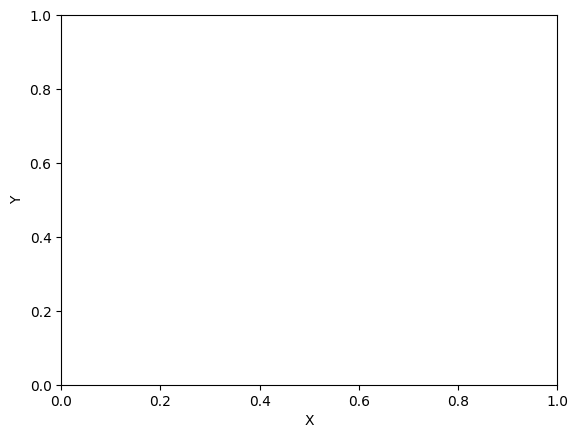

In [57]:
plt.xlabel('X')
plt.ylabel('Y')

ValueError: ignored

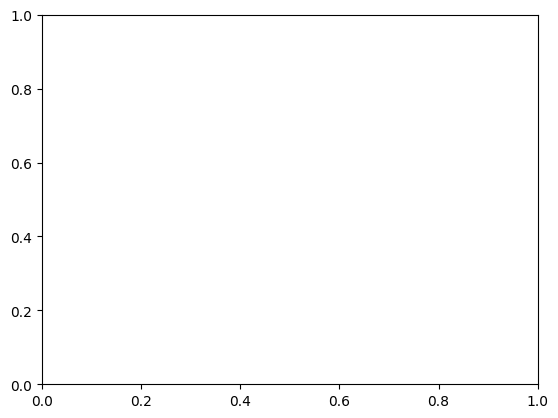

In [59]:
plt.title('KNN', 'LinearRegression', 'SVM')
plt.show()